# HW1 Notebook
#### This assignment will introduce you with the Intel DevCloud and with OpenMP basic directives and concepts of parallel computing as part of the OpenMP Common Core. 

#### Use this notebook to compile your files, submit your jobs to Intel DevCloud nodes and observe/analyze your results.
## Submittion instructions
- #### Publication Date: 19/5.
- #### Submission Date: 8/6.
- #### Submittion in groups of up to 2 students (Submitting in pairs is highly recommended). 
- #### Submittion on the course website, in zip format including this directory with the relevant output, specifically: 
  - the source files.
  - this notebook (run_hw1.ipynb) after executing all the cells. 
  - output files of queued jobs that might be created during the execution. 

### Fill the name and ID of the submitters:
#### Student Name: Shy-El Cohen Student ID: 208888172

**Note:** If you submit in pairs, it is sufficient that only single student submit the assaignment on the course website. \
Remove one line if submitted individually, or keep it empty.

## Problem 1: Know Your Hardware (10 points)
### In this section we will get familiar with Intel DevCloud nodes. 

- The next script is used to print basic hardware specifications of a compute node. Run the next cell to print the content of the script.

In [1]:
#print content of check_specifications.sh
%pycat check_specifications.sh

#!/bin/bash
/bin/echo "##" $(whoami) is checking specifications of a standard CPU Intel DevCloud node
echo "########################################### sycl-ls:"
sycl-ls
echo "########################################### lscpu:"
lscpu
echo "########################################### cat /proc/cpuinfo:"
cat /proc/cpuinfo
echo "########################################### cat /proc/meminfo:"
cat /proc/meminfo
echo "########################################### numactl --hardware"
numactl --hardware
exit


Run the following cell. The output will be created in the current directory. Watch it.

In [2]:
! chmod 755 check_specifications.sh;
! ./check_specifications.sh > output.txt

To see the correct device id, please unset ONEAPI_DEVICE_SELECTOR.



##### Explain what you learned from the specs. Focus on:
- How many CPU and GPU devices are available on this system?
- How many CPU sockets are there in a node?
- How many physical cores for each CPU socket?
- How many Non-Uniform Memory Access (NUMA) nodes are in the system? What does it mean? 
- What does it mean "Thread(s) per core"? (Hint: check in Google for "_Hyper-Threading_").
- What are the cache sizes in the system? 

## Problem 2: Warming-up (10 points)
### What are the difference (if any) between the three code snippets? 

## Problem 3: Mandelbrot area (40 points)
The mandelbrot set is the set of complex numbers _c_ for which the function _z^2+c_ does not diverge when iterated from z=0. 
The area of the Mandelbrot set is known to be around 1.506.
The serial program in _mandel_serial.c_ loops over a grid of points (5000x5000 points) in the complex plane which contains the Mandelbrot set, and tests each point to see whether it is inside or outside the set.
#### In this exercise you will implement various parallel versions of the Mandelbrot program with OpenMP on a CPU node.
#### Edit the following files to implement parallelization with CPU threads for the given serial code using OpenMP according to the following requirements:
- **_mandel_parallel_critical.c_** - implementation using critical sections for synchronization of a single variable.
- **_mandel_parallel_atomic.c_** - implementation using atomic operations for synchronization of a single variable.
- **_mandel_parallel_false_sharing.c_** - implementation with global array of variables, each thread updates its own variable, creating false sharing (then a single thread reduce the results). 
- **_mandel_parallel_padding.c_** - as before, implementation with global array of variables, now using padding to prevent false sharing. 
- **_mandel_parallel_reduction.c_** - implementation with the reduction clause on a parallel loop construct.

##### Hint: In class we saw similar implementations for the Monte Carlo Pi Calculation.
##### You are required to test the parallel implementations with a varying number of compute threads. Note that we already made within the files the infrastructure to loop over varying number of threads (to make it easy to you).
##### Pay attention you keep the timers wrapping the main loop of calculation in your parallel implementations.

#### Then run the following cells, and collect the results.
Note that the _.sh._ files include the compilation of the source file for each implementation. In this assaignment we use the _icx_ compiler.  

In [3]:
cd problem3

/home/u04901c7a7c763ce48d8ed089d5ef65a/pi-estimation/course/HW1/problem3


### mandel_serial.c

In [4]:
! chmod 755 run_serial.sh;  ./run_serial.sh

## u04901c7a7c763ce48d8ed089d5ef65a is running HW1 Problem 1 - Calculate Mandelbrot area - serial
########## Compiling the given serial code
########## Executing the given serial code
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 serial implementation - time: 187.371537 seconds
(Correct answer should be around 1.506)
########## Done serial


### mandel_parallel_critical.c

In [5]:
%pycat mandel_parallel_critical.c

/*
**  PROGRAM: Mandelbrot area
**
**  PURPOSE: Program to compute the area of a  Mandelbrot set.
**           Correct answer should be around 1.510659.
**           WARNING: this program may contain errors
**
**  USAGE:   Program runs without input ... just run the executable
**            
**  HISTORY: Written:  (Mark Bull, August 2011).
**           Changed "comples" to "d_comples" to avoid collsion with 
**           math.h complex type (Tim Mattson, September 2011)
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>
#include <stdbool.h>

# define NPOINTS 5000
# define MAXITER 5000
#define NELEMS(x)  (sizeof(x) / sizeof((x)[0]))

struct d_complex {
   double r;
   double i;
};

bool testpoint(struct d_complex* c);

int main() {
    
   int threads[] = {1,2,4,8,16,24};
   double area, error, eps = 1.0e-5;
   double start_time, run_time;

   // Test varying number of threads: 1,2,4,8,16 and 24 threads
   for (int k=0; k< NELEMS(threads); k++) {
        int n

In [6]:
! chmod 755 run_parallel_critical.sh;  ./run_parallel_critical.sh

## u04901c7a7c763ce48d8ed089d5ef65a is running HW1 Problem 1 - Calculate Mandelbrot area - parallel critical
########## Compiling your parallel critical code
########## Executing your parallel critical code
Area of Mandlebrot set =   1.50763455 +/-   0.00030153, count:18299402

 critical implementation - time: 187.543479 seconds, with 1 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153, count:18299402

 critical implementation - time: 95.403426 seconds, with 2 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153, count:18299402

 critical implementation - time: 49.130840 seconds, with 4 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153, count:18299402

 critical implementation - time: 26.703541 seconds, with 8 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153, count:18299402

 critical implementation - time: 16.603083 seconds, with 16 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153, count:18299402

 critical implementation

### mandel_parallel_atomic.c

In [7]:
%pycat mandel_parallel_atomic.c

/*
**  PROGRAM: Mandelbrot area
**
**  PURPOSE: Program to compute the area of a  Mandelbrot set.
**           Correct answer should be around 1.510659.
**           WARNING: this program may contain errors
**
**  USAGE:   Program runs without input ... just run the executable
**            
**  HISTORY: Written:  (Mark Bull, August 2011).
**           Changed "comples" to "d_comples" to avoid collsion with 
**           math.h complex type (Tim Mattson, September 2011)
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>
#include <stdbool.h>

# define NPOINTS 5000
# define MAXITER 5000
#define NELEMS(x)  (sizeof(x) / sizeof((x)[0]))

struct d_complex {
   double r;
   double i;
};

bool testpoint(struct d_complex* c);

int main() {
    
   int threads[] = {1,2,4,8,16,24};
   double area, error, eps = 1.0e-5;
   double start_time, run_time;

   // Test varying number of threads: 1,2,4,8,16 and 24 threads
   for (int k=0; k< NELEMS(threads); k++) {
        int n

In [8]:
! chmod 755 run_parallel_atomic.sh; ./run_parallel_atomic.sh

## u04901c7a7c763ce48d8ed089d5ef65a is running HW1 Problem 1 - Calculate Mandelbrot area - parallel atomic
########## Compiling your parallel atomic code
########## Executing your parallel atomic code
Area of Mandlebrot set =   1.50763455 +/-   0.00030153, count:18299402

 atomic implementation - time: 187.077229 seconds, with 1 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153, count:18299402

 atomic implementation - time: 94.105887 seconds, with 2 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153, count:18299402

 atomic implementation - time: 47.334586 seconds, with 4 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153, count:18299402

 atomic implementation - time: 23.989051 seconds, with 8 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153, count:18299402

 atomic implementation - time: 12.383734 seconds, with 16 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153, count:18299402

 atomic implementation - time: 8.594127 

### mandel_parallel_false_sharing.c

In [9]:
%pycat mandel_parallel_false_sharing.c

/*
**  PROGRAM: Mandelbrot area
**
**  PURPOSE: Program to compute the area of a  Mandelbrot set.
**           Correct answer should be around 1.510659.
**           WARNING: this program may contain errors
**
**  USAGE:   Program runs without input ... just run the executable
**            
**  HISTORY: Written:  (Mark Bull, August 2011).
**           Changed "comples" to "d_comples" to avoid collsion with 
**           math.h complex type (Tim Mattson, September 2011)
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>
#include <stdbool.h>

# define NPOINTS 5000
# define MAXITER 5000
#define NELEMS(x)  (sizeof(x) / sizeof((x)[0]))

struct d_complex {
   double r;
   double i;
};

bool testpoint(struct d_complex c);

int main() {
    
   int threads[] = {1,2,4,8,16,24};
   double area, error, eps = 1.0e-5;
   double start_time, run_time;

   // Test varying number of threads: 1,2,4,8,16 and 24 threads
   for (int k=0; k< NELEMS(threads); k++) {
        int nu

In [10]:
! chmod 755 run_parallel_false_sharing.sh; ./run_parallel_false_sharing.sh

## u04901c7a7c763ce48d8ed089d5ef65a is running HW1 Problem 1 - Calculate Mandelbrot area - parallel false_sharing
########## Compiling your parallel false_sharing code
########## Executing your parallel false_sharing code
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 187.630280 seconds, with 1 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 159.891218 seconds, with 2 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 85.349113 seconds, with 4 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 52.467913 seconds, with 8 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 29.062318 seconds, with 16 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 20.767110 seconds, with 24 threads
(Correct answer should be around 1.5

### mandel_parallel_padding.c

In [11]:
%pycat mandel_parallel_padding.c

/*
**  PROGRAM: Mandelbrot area
**
**  PURPOSE: Program to compute the area of a  Mandelbrot set.
**           Correct answer should be around 1.510659.
**           WARNING: this program may contain errors
**
**  USAGE:   Program runs without input ... just run the executable
**            
**  HISTORY: Written:  (Mark Bull, August 2011).
**           Changed "comples" to "d_comples" to avoid collsion with 
**           math.h complex type (Tim Mattson, September 2011)
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>
#include <stdbool.h>

# define NPOINTS 5000
# define MAXITER 5000
# define PADSIZE 8
#define NELEMS(x)  (sizeof(x) / sizeof((x)[0]))

struct d_complex {
   double r;
   double i;
};

bool testpoint(struct d_complex c);

int main() {
    
   int threads[] = {1,2,4,8,16,24};
   double area, error, eps = 1.0e-5;
   double start_time, run_time;

   // Test varying number of threads: 1,2,4,8,16 and 24 threads
   for (int k=0; k< NELEMS(threads); k+

In [12]:
! chmod 755 run_parallel_padding.sh; ./run_parallel_padding.sh

## u04901c7a7c763ce48d8ed089d5ef65a is running HW1 Problem 1 - Calculate Mandelbrot area - parallel padding
########## Compiling your parallel padding code
########## Executing your parallel padding code
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 187.542086 seconds, with 1 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 93.765402 seconds, with 2 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 46.879399 seconds, with 4 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 23.518371 seconds, with 8 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 11.905491 seconds, with 16 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 8.112297 seconds, with 24 threads
(Correct answer should be around 1.506)
########## Done 

### mandel_parallel_reduction.c

In [13]:
%pycat mandel_parallel_reduction.c

/*
**  PROGRAM: Mandelbrot area
**
**  PURPOSE: Program to compute the area of a  Mandelbrot set.
**           Correct answer should be around 1.510659.
**           WARNING: this program may contain errors
**
**  USAGE:   Program runs without input ... just run the executable
**            
**  HISTORY: Written:  (Mark Bull, August 2011).
**           Changed "comples" to "d_comples" to avoid collsion with 
**           math.h complex type (Tim Mattson, September 2011)
*/

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>
#include <stdbool.h>

# define NPOINTS 5000
# define MAXITER 5000
#define NELEMS(x)  (sizeof(x) / sizeof((x)[0]))

struct d_complex {
   double r;
   double i;
};

bool testpoint(struct d_complex c);

int main() {
    
   int threads[] = {1,2,4,8,16,24};
   double area, error, eps = 1.0e-5;
   double start_time, run_time;

   // Test varying number of threads: 1,2,4,8,16 and 24 threads
   for (int k=0; k< NELEMS(threads); k++) {
        int nu

In [14]:
! chmod 755 run_parallel_reduction.sh; ./run_parallel_reduction.sh

## u04901c7a7c763ce48d8ed089d5ef65a is running HW1 Problem 1 - Calculate Mandelbrot area - parallel reduction
########## Compiling your parallel reduction code
########## Executing your parallel reduction code
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 187.560055 seconds, with 1 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 93.773503 seconds, with 2 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 46.889241 seconds, with 4 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 23.464912 seconds, with 8 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 11.958152 seconds, with 16 threads
Area of Mandlebrot set =   1.50763455 +/-   0.00030153

 critical implementation - time: 7.924183 seconds, with 24 threads
(Correct answer should be around 1.506)
##########

### Summering the results
#### Fill the following table with the execution times (in seconds) according to the number of threads:
|  Number of Threads  |      serial       |      critical       |      atomic         |     false sharing   |      padding        |      reduction     |
|:-------------------:|:-----------------:|:-------------------:|:-------------------:|:-------------------:|:-------------------:|:------------------:|
| 1                   |      187.371      |        187.543479   |      187.077229     |        187.630280   |        187.542086   |        187.560055  |
| 2                   |       --          |        95.403426    |       94.196271     |        159.891218    |       93.7654028    |       93.7735039   |
| 4                   |       --          |        49.130840    |       47.362274     |       85.3491138    |       46.8793991    |       46.8892416   |
| 8                   |       --          |        26.703541    |       24.096808     |       52.4679131    |       23.5183717    |       23.4649124   |
| 16                  |       --          |        16.603083    |      12.3837347     |       29.0623182    |       11.9054918    |       11.9581521   |
| 24                  |       --          |        13.342304    |      8.5941272      |       20.767110     |       8.1122976     |       7.9241834    |


### Fill the results in the following pyplot figure to create a stong scale graph:
Note that the values on the graph should be the speedup achieved (relative to a serial computation).

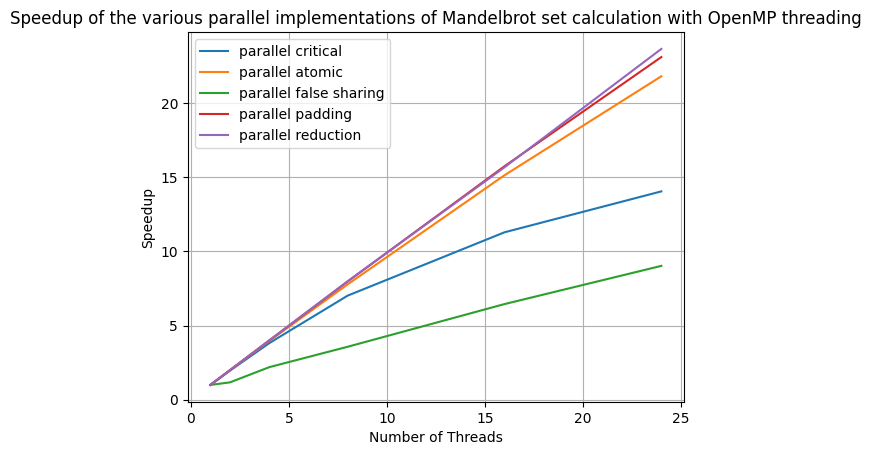

In [15]:
import matplotlib.pyplot as plt
threads = [1,2,4,8,16,24]

runtime_serial = 187.344
runtime_critical = [187.543479,95.403426,49.130840,26.703541,16.603083,13.342304,]
runtime_atomic = [187.077229,94.196271,47.362274,24.096808,12.3837347,8.5941272]
runtime_false_sharing = [187.630280,159.891218,85.3491138,52.4679131,29.0623182,20.767110]
runtime_padding = [187.542086,93.7654028,46.8793991,23.5183717,11.9054918,8.1122976]
runtime_reduction = [187.560055,93.7735039,46.8892416,23.4649124,11.9581521,7.9241834]

speedup_critical = [ runtime_serial/runtime for runtime in runtime_critical]
speedup_atomic = [ runtime_serial/runtime for runtime in runtime_atomic]
speedup_false_sharing = [ runtime_serial/runtime for runtime in runtime_false_sharing]
speedup_padding = [ runtime_serial/runtime for runtime in runtime_padding]
speedup_reduction = [ runtime_serial/runtime for runtime in runtime_reduction]

plt.plot(threads, speedup_critical, label = "parallel critical")
plt.plot(threads, speedup_atomic, label = "parallel atomic")
plt.plot(threads, speedup_false_sharing, label = "parallel false sharing")
plt.plot(threads, speedup_padding, label = "parallel padding")
plt.plot(threads, speedup_reduction, label = "parallel reduction")
  
# naming the x axis
plt.xlabel('Number of Threads')
# naming the y axis
plt.ylabel('Speedup')
# giving a title to my graph
plt.title('Speedup of the various parallel implementations of Mandelbrot set calculation with OpenMP threading')
plt.grid()
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

### Explain the results
Try to explain the results, by comparing the results of different implementations.

## Problem 4: nowait clause (10 points)
**The nowait clause is used to avoid the implied barrier at the end of a loop construct, when you have multiple independent loops within a parallel region.** \
For each following code snippet, we added OpenMP parallelization using the nowait clause to a given code section. 
We assume that a,b,y and z point to different pre-allocated arrays (each of size n). \
**For each code snippet, decide whether the parallel code is correct (always brings to the same result as in a serial execution), and explain your decision.**

## Problem 5: Count Prime Numbers (30 points)
**The schedule clause is used to provide more control over how iterations of a worksharing-loop construct are scheduled onto the threads, usually to balance the workload across threads. It supports both static and dynamic scheduling.**

In [ ]:
cd ../problem5

The following serial code counts the amount of prime numbers up to a given limit, by checking for each integer whther it is prime or not.

In [ ]:
%pycat prime_parallel_schedule.c

In this problem you are required to add parallelization to the main loop of the problem, **using the reduction and schedule clauses**. \
The main focus in your solution will be on choosing the best schedule method (default, static, dynamic, etc) along with the optimized chunk size for a given CPU node on Intel DevCloud. 
#### Fill the following table with run times (in seconds) for each schedule you examine and for different numbers of threads. Then report what is the optimal schedule method you found and explain your observation. Fill free to add/edit lines in order to tune the parameters, finding the best option you can.

|  schedule           |      2 threads    |      4 threads      |      8 threads      |  
|:-------------------:|:-----------------:|:-------------------:|:-------------------:|
| default             |       81.807999       |    43.862739fill    |    22.635594fill    |
| static              |   81.795590fil    |    43.861479fill    |    22.617479fill    |
| static,4            |   65.260826fil    |    32.580807fill    |    16.330192fill    |
| dynamic,8           |   65.421004fil    |    32.542397fill    |    16.277943fill    |
| guided              |   65.157981fil    |    32.547578fill    |    16.279806fill    |
| .                   |       fill        |        fill         |        fill         |
| .                   |       fill        |        fill         |        fill         |
| .                   |       fill        |        fill         |        fill         |


Use _prime_parallel.c_ to edit your parallel implementation. The next cell will help you to execute every time you examine a new schedule option. When you finish, keep the file _prime_parallel.c_ with the optimal schedule you found and execute again. 

In [ ]:
%pycat prime_parallel_schedule.c

In [ ]:
!  chmod 755 run_parallel_schedule.sh; ./run_parallel_schedule.sh

What is the optimal scheduling method you have found? Compare between the different scheduling methods.

### Intel VTune
**Now you will get experienced with Intel VTune, to analyze the load balancing of your prime numbers program.** \
According to the table above, find one good scheduling method and one bad scheduling method. Use VTune to show the good/bad load balancing between all the threads for both executions respectively. \
Upload a printscreen of the threading information from VTune. Upload both images in the current directory (problem5) with the following names respectively: \
_vtune_good_load_balancing.png_ \
_vtune_bad_load_balancing.png_ \
You can use the _upload_ button in JupyterLab to easily upload the images. 
Then run both cells to show the images on the notebook.


### NOTE:
I ran with 2,4 and 8 threads in all runs, it is clearly visible in the images.

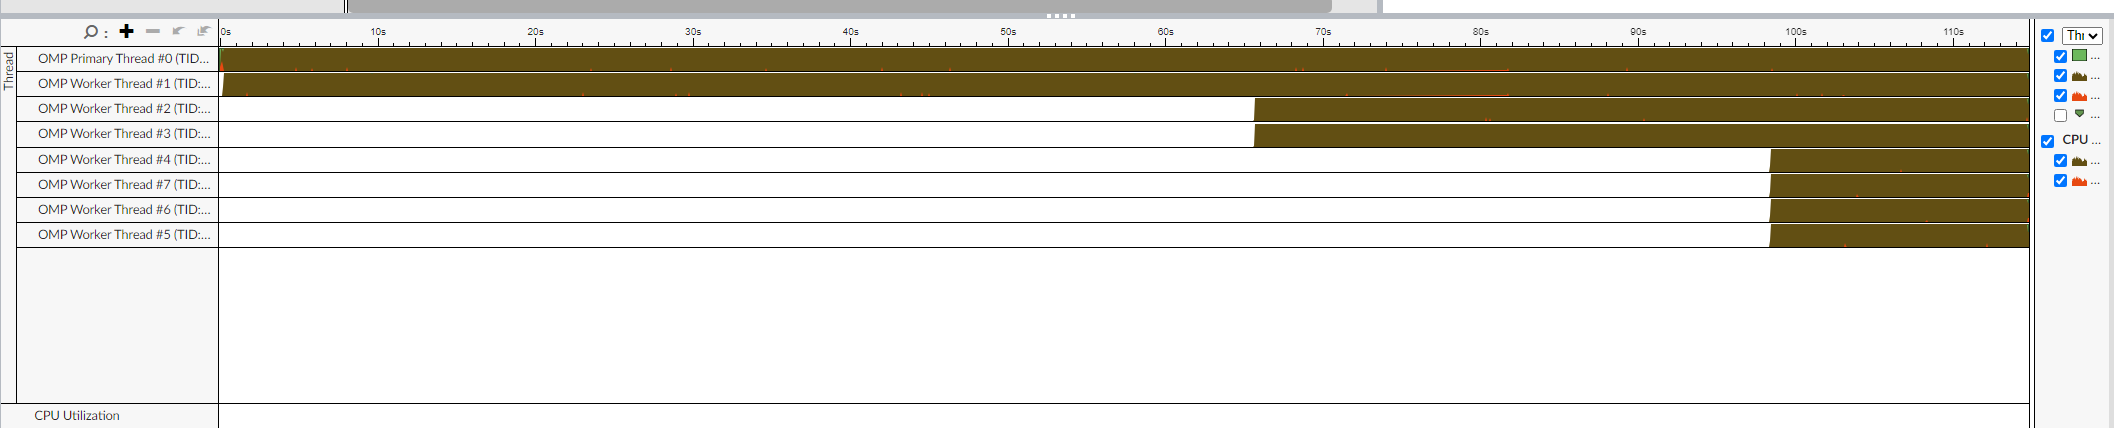

In [1]:
from IPython.display import Image
Image(filename='vtune_good_load_balancing.png') 

There is barely any spin abd overtime and CPU time is almost at 100% (can barely see any green).
(dynamic, 8)

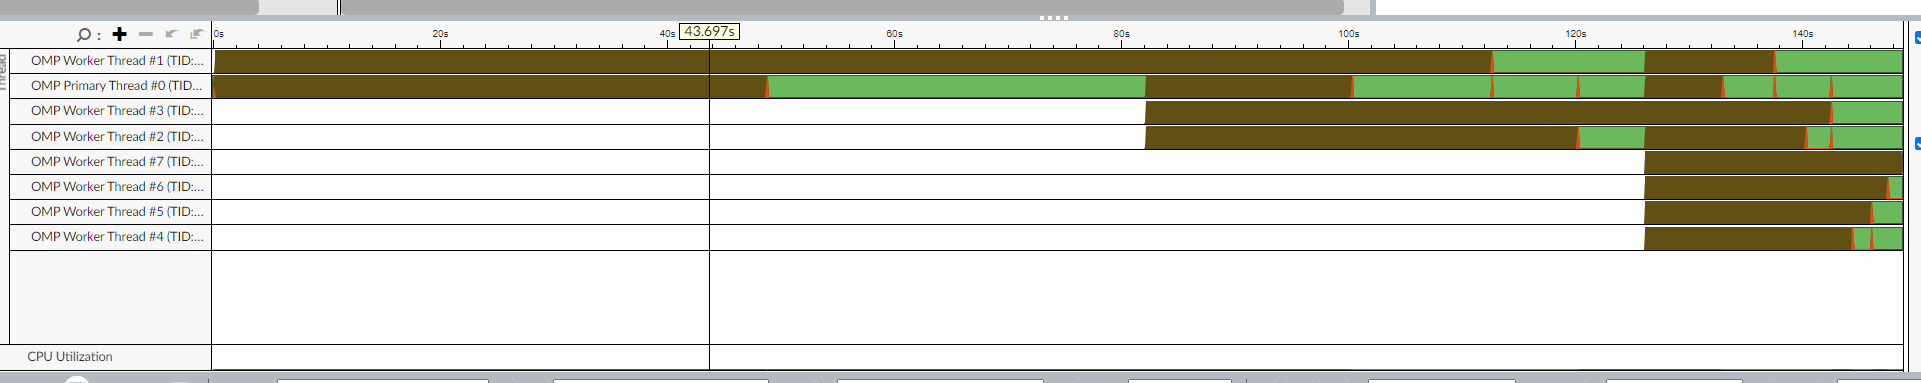

In [2]:
Image(filename='vtune_bad_load_balancing.png') 

In comparison the static example has a great disparity between the threads.